In [1]:
import pandas as pd
import os
import numpy as np
import sqlite3
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect(r"C:\Users\20232788\Downloads\tweets4.db")

# Define your query
query = "SELECT id_str, text, created_at, user_id_str, sent_vader, topic FROM tweets"

# Execute the query and load the results into a DataFrame
tweets_df = pd.read_sql_query(query, conn)

conn.close()

In [15]:
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

In [16]:
tweets_df.head()

,id_str,text,created_at,user_id_str,sent_vader,topic
0,1131172864147808257,RT @bttr_as1: @goody_tracy Here’s a list of so...,2019-05-22 12:20:01+00:00,3420691215,0.3612,Flight Cancellation/Refounds
1,1131172909463027720,RT @TheRaceRadio: Nice change by @AmericanAir....,2019-05-22 12:20:12+00:00,36488556,0.3400,Flight Cancellation/Refounds
2,1131172975682605058,RT @sandeeprrao1991: BREAKING:-\nKLM to fly 3x...,2019-05-22 12:20:28+00:00,14193348,0.0000,Customer Services
3,1131173010235375617,EasyJet was on a slippery slope when it charge...,2019-05-22 12:20:36+00:00,1025334292166127617,-0.2023,Customer Services
4,1131173010508062721,Thanks @British_Airways I really needed the ex...,2019-05-22 12:20:36+00:00,1662186764,0.1531,Flight Cancellation/Refounds


In [29]:
tweets_df.set_index(tweets_df['created_at'])

,id_str,text,created_at,user_id_str,sent_vader,topic
created_at,,,,,,
2019-05-22 12:20:01+00:00,1131172864147808257,RT @bttr_as1: @goody_tracy Here’s a list of so...,2019-05-22 12:20:01+00:00,3420691215,0.3612,Flight Cancellation/Refounds
2019-05-22 12:20:12+00:00,1131172909463027720,RT @TheRaceRadio: Nice change by @AmericanAir....,2019-05-22 12:20:12+00:00,36488556,0.3400,Flight Cancellation/Refounds
2019-05-22 12:20:28+00:00,1131172975682605058,RT @sandeeprrao1991: BREAKING:-\nKLM to fly 3x...,2019-05-22 12:20:28+00:00,14193348,0.0000,Customer Services
2019-05-22 12:20:36+00:00,1131173010235375617,EasyJet was on a slippery slope when it charge...,2019-05-22 12:20:36+00:00,1025334292166127617,-0.2023,Customer Services
2019-05-22 12:20:36+00:00,1131173010508062721,Thanks @British_Airways I really needed the ex...,2019-05-22 12:20:36+00:00,1662186764,0.1531,Flight Cancellation/Refounds
...,...,...,...,...,...,...
2020-03-30 18:43:08+00:00,1244696679057629185,RT @mrjakehumphrey: I’m really uneasy with Eas...,2020-03-30 18:43:08+00:00,59885654,-0.4391,Easyjet Franchise
2020-03-30 18:43:09+00:00,1244696682979303426,@Jade_Velveteese Hi Jade. We have an ‘Away fro...,2020-03-30 18:43:09+00:00,20626359,0.5719,Customer Services
2020-03-30 18:43:09+00:00,1244696684883513351,RT @mrjakehumphrey: I’m really uneasy with Eas...,2020-03-30 18:43:09+00:00,739997672,-0.4391,Easyjet Franchise


In [30]:
# 1 june 2019 until 20 sept 2019
start_date= "2019-06-01 12:20:01+00:00"
end_date = "2019-09-20 12:20:01+00:00"
sliced_df = tweets_df.loc[start_date:end_date]

In [31]:
sliced_df.head()

,id_str,text,created_at,user_id_str,sent_vader,topic


In [3]:
conn = sqlite3.connect(r"C:\Users\20232788\Downloads\Conv_final.db")
cursor = conn.cursor()

# Query filtered conversations
query = "SELECT conversation_id, conversation_json FROM filtered_conversations"
cursor.execute(query)
raw_conversations = cursor.fetchall()

conn.close()

In [20]:

def parse_replies(replies, level, conversation_id, parsed_data):
    for reply in replies:
        parsed_data.append({
            'conversation_id': conversation_id,
            'reply_level': level,
            'id_str': reply['id_str'],
            'user_id': reply['user_id'],
            'created_at': reply['created_at'],
            'user_type': reply['user_type'],
            'replies': reply['replies'],
            'topic': reply.get('topic'),
            'sent_vader': reply.get('sent_vader'),
            'sentiment_evolution': reply.get('sentiment_evolution')
        })
        if reply['replies']:
            parse_replies(reply['replies'], level + 1, conversation_id, parsed_data)

parsed_data = []

for conv_id, conv_json in raw_conversations:
    conversation = json.loads(conv_json)
    for message in conversation:
        parsed_data.append({
            'conversation_id': conv_id,
            'reply_level': 0,
            'id_str': message['id_str'],
            'user_id': message['user_id'],
            'created_at': message['created_at'],
            'user_type': message['user_type'],
            'replies': message['replies'],
            'topic': message.get('topic'),
            'sent_vader': message.get('sent_vader'),
            'sentiment_evolution': message.get('sentiment_evolution')
        })
        if message['replies']:
            parse_replies(message['replies'], 1, conv_id, parsed_data)

# Drop the 'replies' column as we don't need it in the final DataFrame
for entry in parsed_data:
    entry.pop('replies', None)

# Create a DataFrame
conv_df = pd.DataFrame(parsed_data)

# Set multi-index
conv_df.set_index(['conversation_id', 'reply_level'], inplace=True)

In [5]:
conv_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 790659 entries, (1, 0) to (56238, 0)
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_str               790659 non-null  object 
 1   user_id              790659 non-null  object 
 2   created_at           790659 non-null  object 
 3   user_type            790659 non-null  object 
 4   topic                790659 non-null  object 
 5   sent_vader           790659 non-null  float64
 6   sentiment_evolution  136871 non-null  float64
dtypes: float64(2), object(5)
memory usage: 48.4+ MB


In [21]:
start_date= "2019-06-01"
end_date = "2019-09-20"
sliced_conv_df = conv_df.loc[start_date:end_date]

In [23]:
# Group the conversation_df DataFrame by the conversation_run_number
grouped_conversations = conv_df.groupby('reply_level')

# Calculate the number of unique topics in each conversation
unique_topics = grouped_conversations['topic'].nunique()

# Calculate the total number of messages in each conversation
message_counts = grouped_conversations.size()

# Calculate the percentage of monothematic conversations
monothematic_percentage = (unique_topics == 1).mean() * 100

# Calculate the percentage of plurithematic conversations
plurithematic_percentage = 100 - monothematic_percentage

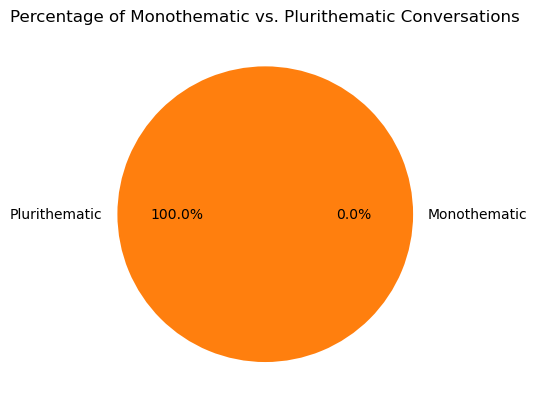

In [19]:
# Create a list of percentages
percentages = [monothematic_percentage, plurithematic_percentage]

# Create a list of labels
labels = ['Monothematic', 'Plurithematic']

# Create the pie chart
plt.pie(percentages, labels=labels, autopct='%1.1f%%')

# Set the title of the chart
plt.title('Percentage of Monothematic vs. Plurithematic Conversations')

# Display the chart
plt.show()

In [26]:
users = {
    56377143: {'name': 'KLM'},
    106062176: {'name': 'AirFrance'},
    18332190: {'name': 'British_Airways'},
    22536055: {'name': 'AmericanAir'},
    124476322: {'name': 'Lufthansa'},
    26223583: {'name': 'AirBerlin'},
    2182373406: {'name': 'AirBerlin assist'},
    38676903: {'name': 'easyJet'},
    1542862735: {'name': 'RyanAir'},
    253340062: {'name': 'SingaporeAir'},
    218730857: {'name': 'Qantas'},
    45621423: {'name': 'EtihadAirways'},
    20626359: {'name': 'VirginAtlantic'}
}

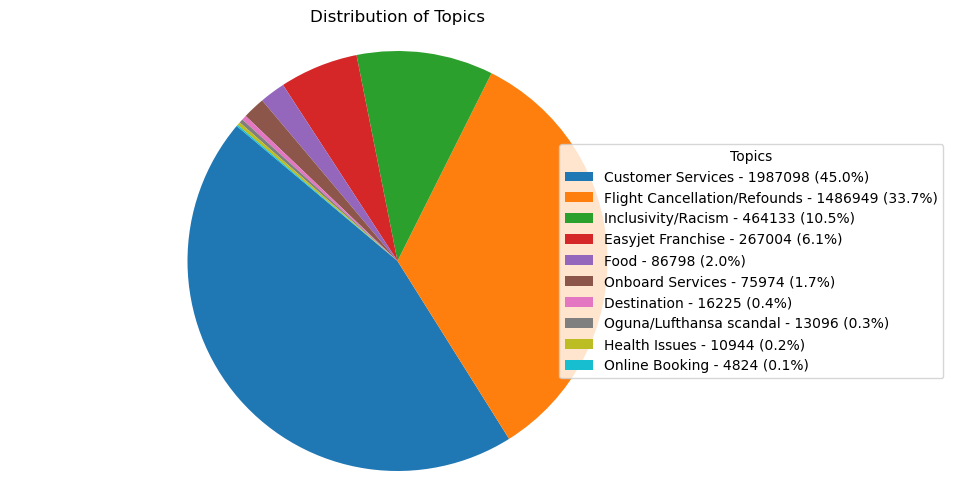

In [25]:
topic_counts = tweets_df['topic'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts = ax.pie(topic_counts, startangle=140, textprops=dict(color="w"))

# Create legend with labels and percentages
ax.legend(wedges, [f'{label} - {count} ({percentage:.1f}%)' for label, count, percentage in 
                   zip(topic_counts.index, topic_counts, (topic_counts / topic_counts.sum() * 100))],
          title="Topics",
          loc="center left",
          bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.title('Distribution of Topics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

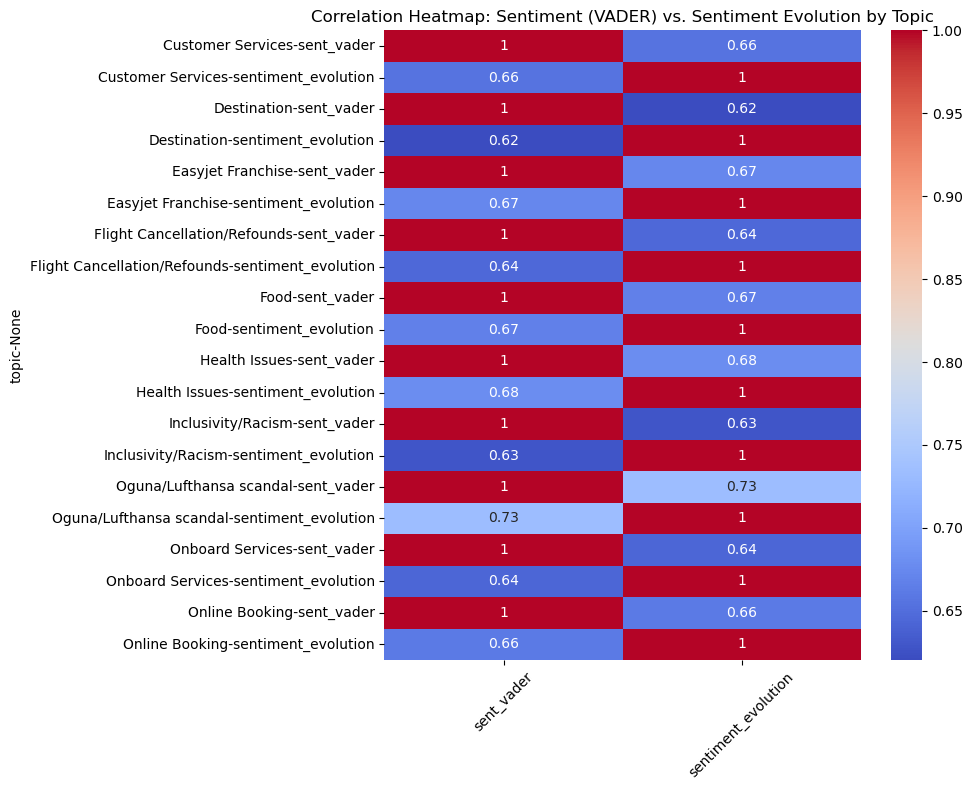

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(conv_df.groupby('topic')[['sent_vader', 'sentiment_evolution']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Sentiment (VADER) vs. Sentiment Evolution by Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\20232788\AppData\Local\Temp\ipykernel_5248\738658706.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = conv_df.groupby('topic')['sentiment_evolution'].resample('M').mean().reset_index()


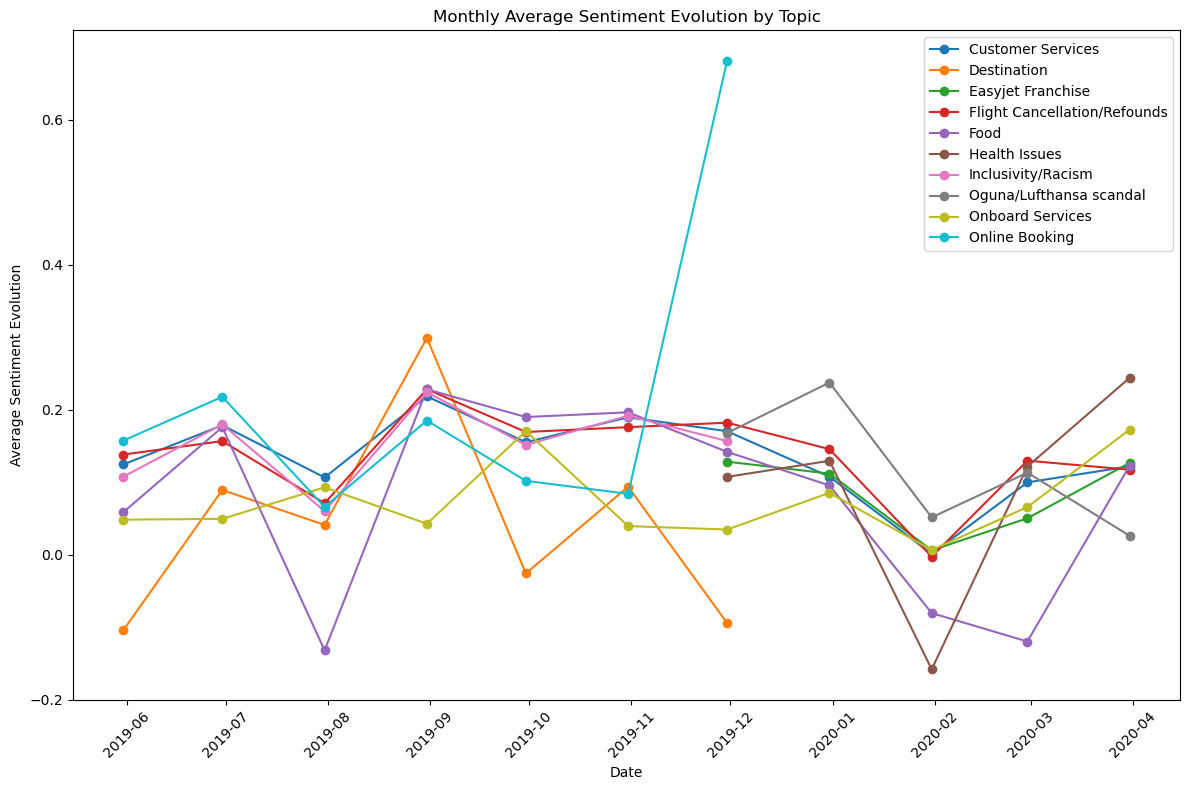

In [61]:
conv_df['created_at'] = pd.to_datetime(conv_df['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# Set 'created_at' as the index for easier resampling
conv_df.set_index('created_at', inplace=True)

# Resample data by month and calculate the mean sentiment_evolution
monthly_avg = conv_df.groupby('topic')['sentiment_evolution'].resample('M').mean().reset_index()

# Plot monthly average sentiment evolution for each topic
plt.figure(figsize=(12, 8))
for topic, data in monthly_avg.groupby('topic'):
    plt.plot(data['created_at'], data['sentiment_evolution'], label=topic, marker='o', linestyle='-')
plt.title('Monthly Average Sentiment Evolution by Topic')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Evolution')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

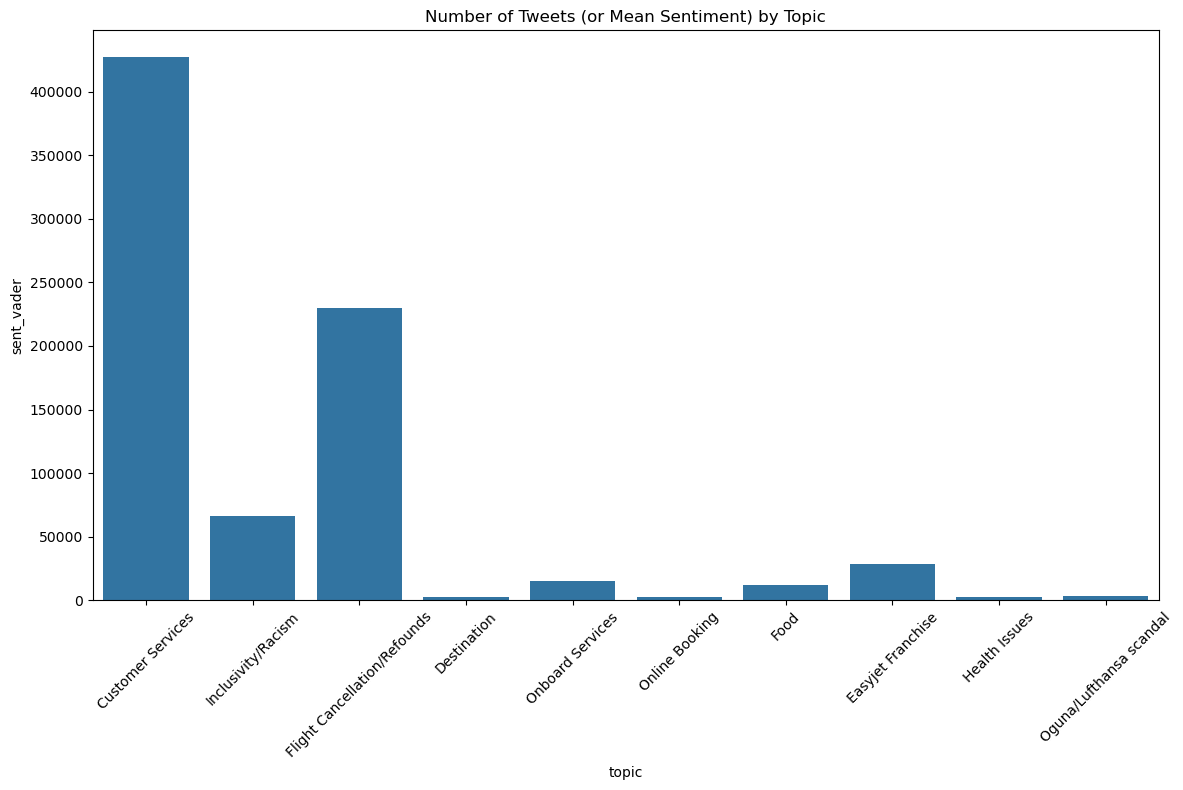

In [60]:
plt.figure(figsize=(12, 8))
sns.barplot(data=conv_df, x='topic', y='sent_vader', estimator=len)  # Use estimator=sum for mean sentiment
plt.title('Number of Tweets (or Mean Sentiment) by Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
conv_df['created_at'] = pd.to_datetime(conv_df['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# Extract month and year from 'created_at' to create new columns
conv_df['year'] = conv_df['created_at'].dt.year
conv_df['month'] = conv_df['created_at'].dt.month


pivot_df = conv_df.pivot_table(index='topic', columns=['year', 'month'], values='sentiment_evolution', aggfunc='mean')
pivot_df.fillna(0, inplace=True)

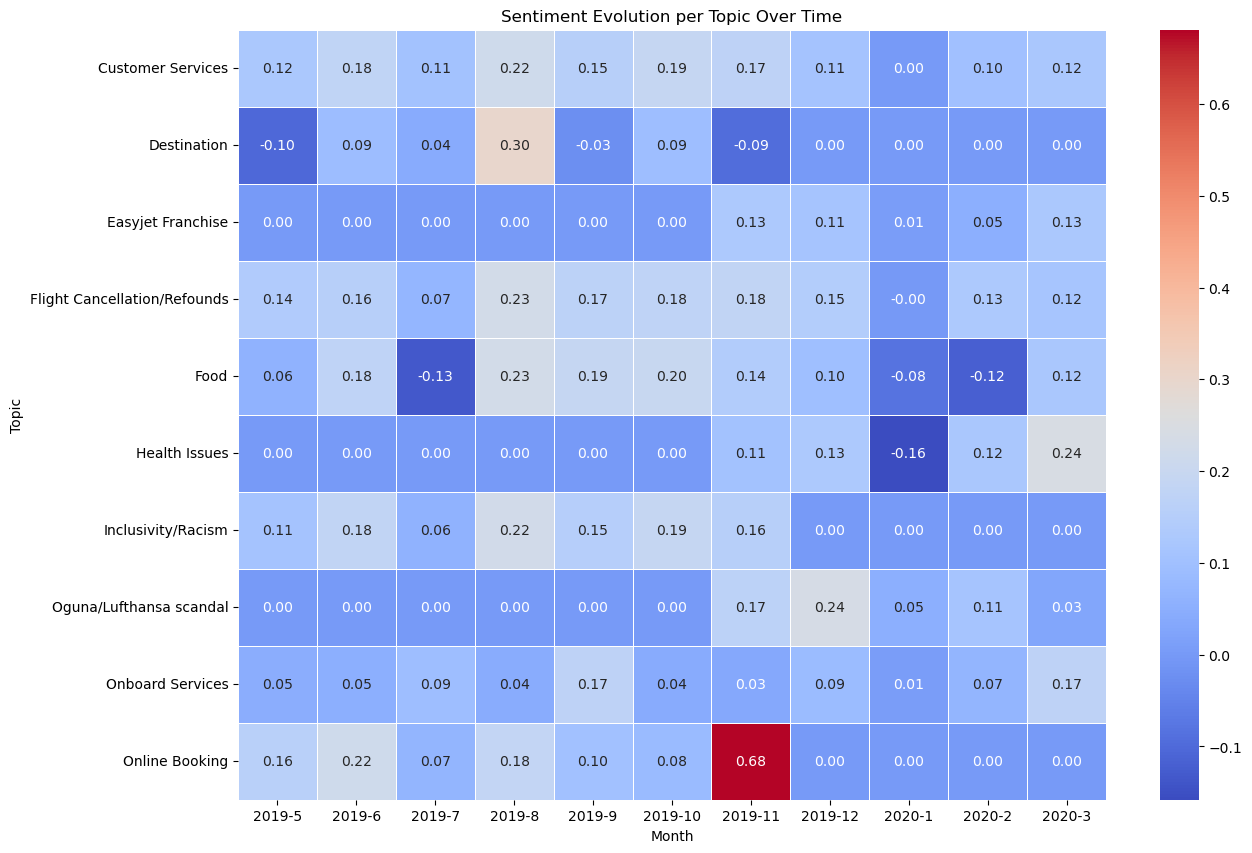

In [10]:
plt.figure(figsize=(14, 10))


sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)


plt.title('Sentiment Evolution per Topic Over Time')
plt.xlabel('Month')
plt.ylabel('Topic')


plt.show()